In [3]:
from importlib import reload
import logging
reload(logging)

logging.basicConfig(
    format="%(levelname)s: %(asctime)s: %(message)s",
    level=logging.
)
logging.info('Check')

INFO: 2025-01-12 19:40:47,425: Check


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/KaggleV2-May-2016.csv')

DEBUG: 2025-01-12 19:52:34,484: CACHEDIR=C:\Users\mi_al\.matplotlib
DEBUG: 2025-01-12 19:52:34,494: Using fontManager instance from C:\Users\mi_al\.matplotlib\fontlist-v330.json


DEBUG: 2025-01-12 19:52:40,080: Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG: 2025-01-12 19:52:40,139: Loaded backend module://matplotlib_inline.backend_inline version unknown.


DEBUG: 2025-01-12 19:52:40,296: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG: 2025-01-12 19:52:40,298: findfont: score(FontEntry(fname='c:\\Users\\mi_al\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2025-01-12 19:52:40,303: findfont: score(FontEntry(fname='c:\\Users\\mi_al\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG: 2025-01-12 19:52:40,312: findfont: score(FontEntry(fname='c:\\Users\\mi_al\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='norma

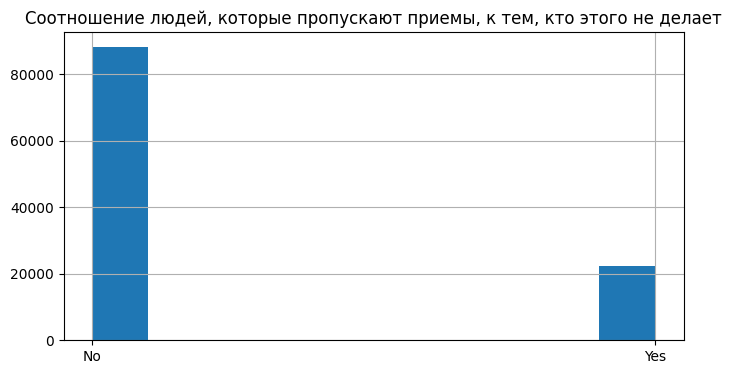

In [9]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

In [10]:
df['No-show'].value_counts(True)

No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64

In [11]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

Gender
F    0.653882
M    0.346118
Name: proportion, dtype: float64

In [12]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

In [14]:
import os.path

# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

# создаем лог-файл
logger = get_logger(path="logs", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO: 2025-01-12 20:02:36,732: Data
INFO: 2025-01-12 20:02:36,746: Data shape (110527, 14)
C:\Users\mi_al\AppData\Local\Temp\ipykernel_97160\3976623236.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))
INFO: 2025-01-12 20:02:37,878: Percentage of women: 0.653882342398853
C:\Users\mi_al\AppData\Local\Temp\ipykernel_97160\3976623236.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))
INFO: 2025-01-12 20:02:37,908

In [15]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR: 2025-01-12 20:05:19,540: Data shape is incorrect!


In [3]:
from comet_ml import Experiment

# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="TK5QJvERLpJ0uvFbzeOt6RJc2",
    project_name="skillfactory-project",
    workspace="mi-alexandre",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/mi-alexandre/skillfactory-project/372b892acc9d4071acc3ac935fd25bf4



COMET ERROR: Due to connectivity issues, there's an error in processing the heartbeat. The experiment's status updates might be inaccurate until the connection issues are resolved.
